In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/Airbnb_Open_Data.csv', low_memory = 'False')

/tmp/ipython-input-1338024877.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/Airbnb_Open_Data.csv', low_memory = 'False')


In [3]:
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-21,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-22,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-19,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-18,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
#data.tail()

In [5]:
#data.dtypes

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [7]:
data.duplicated().value_counts()

,count
False,102058
True,541


In [8]:
# Neighbourhood was 'brookln' instead of 'Brooklyn'
data[data['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,24-06-19,1.34,4.0,3.0,47.0,NaN,NaN


In [9]:
#Drop duplicate records
data.drop_duplicates(inplace = True)

# Drop house_rules and license columns with insufficient data
data.drop(['house_rules', 'license'], axis = 1, inplace= True)

# Before using .str, ensure the data is converted to a string
data['price'] = data['price'].astype(str).str.replace('$', '', regex= False)
data['service fee'] = data['service fee'].astype(str).str.replace('$', '', regex= False)

# Remove all dollar signs in the price and service fee columns
data['price'] = data['price'].str.replace('$', '', regex= False)
data['service fee'] = data['service fee'].str.replace('$', '', regex= False)

# Remove all commas in the price and service fee columns
data['price'] = data['price'].str.replace(',', '', regex= False)
data['service fee'] = data['service fee'].str.replace(',', '', regex= False)

#Rename the price and service fee columns to include a dollar sign
data.rename(columns = {
    'price': 'price_$',
    'service fee': 'service fee_$'
}, inplace = True)

# Drop all records with missing values
data.dropna(inplace = True)

# Change all mismatched data types to the appropriate ones.
data['price_$'] = data['price_$'].astype(float)
data['service fee_$'] = data['service fee_$'].astype(float)
data['id'] = data['id'].astype(str)
data['host id'] = data['host id'].astype(str)
data['last review'] = pd.to_datetime(data['last review'])
data['Construction year'] = data['Construction year'].astype(int)

# Correct the spelling of 'brookln' to 'Brooklyn'
data.loc[data['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

# Get rid of outliers in the availability 365' column data
data = data.drop(data[data['availability 365'] > 500].index)

/tmp/ipython-input-3173558879.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['last review'] = pd.to_datetime(data['last review'])


In [10]:
data.duplicated().value_counts()

,count
False,83818


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83818 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83818 non-null  object        
 1   NAME                            83818 non-null  object        
 2   host id                         83818 non-null  object        
 3   host_identity_verified          83818 non-null  object        
 4   host name                       83818 non-null  object        
 5   neighbourhood group             83818 non-null  object        
 6   neighbourhood                   83818 non-null  object        
 7   lat                             83818 non-null  float64       
 8   long                            83818 non-null  float64       
 9   country                         83818 non-null  object        
 10  country code                    83818 non-null  object        
 11  instan

In [12]:
data.describe()

,lat,long,Construction year,price_$,service fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83818.000000,83818.000000,83818.000000,83618.000000,83589.000000,83818.000000,83818.000000,83818,83818.000000,83818.000000,83818.000000,83818.000000
mean,40.727357,-73.948500,2012.490217,626.345476,125.233033,7.436028,32.241893,2019-06-03 19:24:16.613137920,1.375827,3.278902,7.049691,141.755411
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-01-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687660,-73.982110,2007.000000,341.000000,68.000000,2.000000,3.000000,2018-10-15 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721330,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-05-31 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762580,-73.930800,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-09-06 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-12-02 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056315,0.050343,5.760865,331.793162,66.354589,28.119584,51.901397,NaN,1.749397,1.283646,29.564849,133.399179


In [13]:
# What are the different property types in the dataset?
property_types = data['room type'].value_counts().to_frame()
print(property_types)

                 count
room type             
Entire home/apt  44369
Private room     37684
Shared room       1655
Hotel room         110


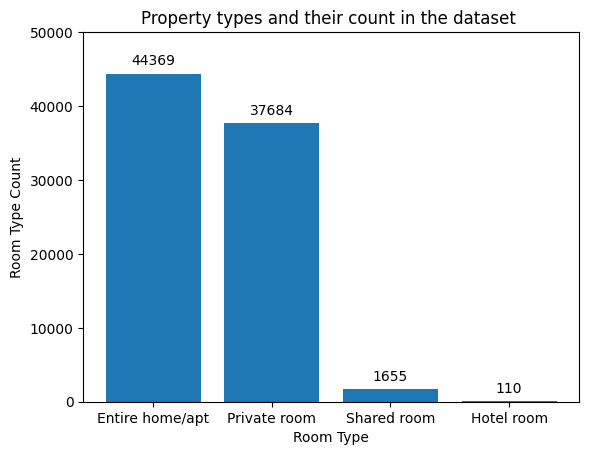

In [14]:
# Room type count plotted on bar chart
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar, labels = property_types.loc[:,"count"], padding = 4);
plt.ylim(0, 50000);
plt.title('Property types and their count in the dataset ');
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
#

In [15]:
hood_group = data['neighbourhood group'].value_counts().to_frame()
print(hood_group)

                     count
neighbourhood group       
Brooklyn             34794
Manhattan            34741
Queens               11186
Bronx                 2276
Staten Island          821


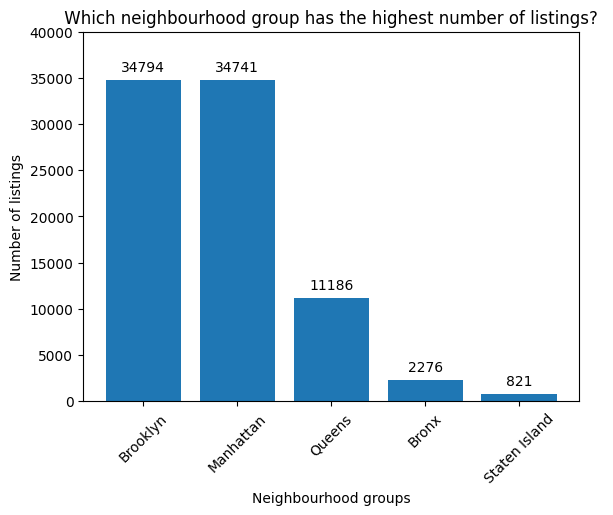

In [16]:
# Which neighbourhood has the highest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:,"count"], padding = 4);
plt.ylim(0, 40000);
plt.title(' Which neighbourhood group has the highest number of listings? ');
plt.xlabel('Neighbourhood groups');
plt.ylabel('Number of listings');
plt.xticks(rotation = 45);
#

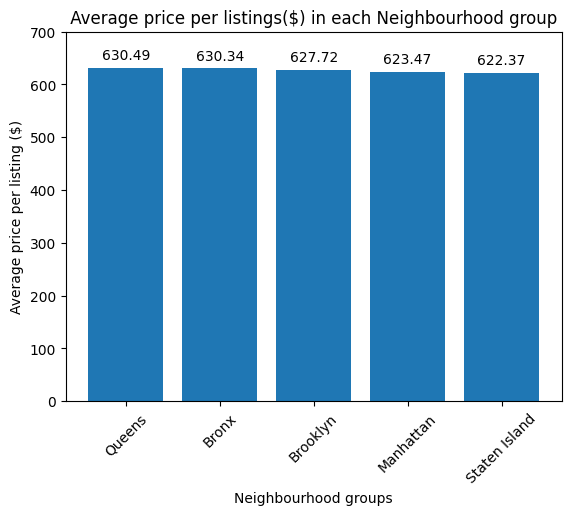

In [17]:
# Which neighbourhood group have the highest average prices for AirBnB listings?
avg_price = data.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending= False ).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,"price_$"]);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,"price_$"], 2),label_type= 'edge', padding = 4);
plt.ylim(0, 700);
plt.title(' Average price per listings($) in each Neighbourhood group ');
plt.xlabel('Neighbourhood groups');
plt.ylabel('Average price per listing ($)');
plt.xticks(rotation = 45);
#

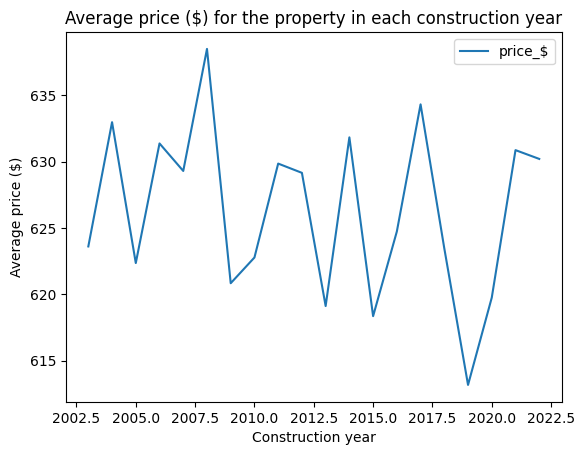

In [18]:
# Is there a relationship between the construction year of property and price?
data.groupby(data['Construction year'])['price_$'].mean().to_frame().plot();
plt.title('Average price ($) for the property in each construction year');
plt.xlabel('Construction year');
plt.ylabel('Average price ($)');
#

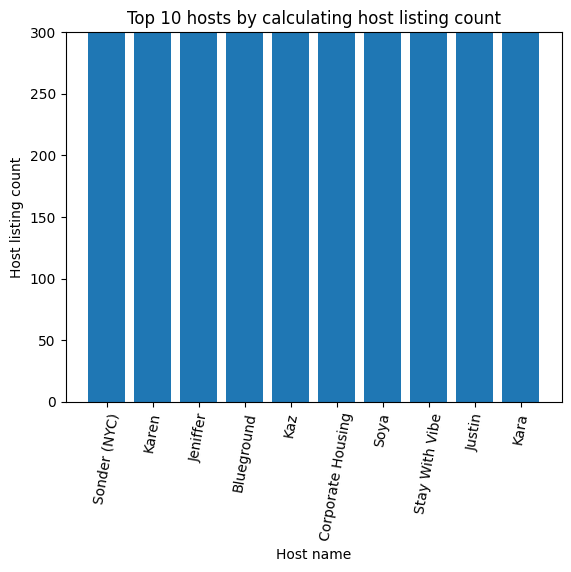

In [19]:
# Who are the top 10 hosts by calculating host listing count?
hosts = data.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,"calculated host listings count"]);
plt.bar_label(hosts_bar, labels = hosts.loc[:,"calculated host listings count"],label_type='edge', padding = 3);
plt.xlabel('Host name');
plt.ylabel('Host listing count');
plt.xticks(rotation = 80);
plt.ylim(0, 300);
plt.title('Top 10 hosts by calculating host listing count');

In [20]:
# Are hosts with verified identities more likely to receive positive reviews?
review = data.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.283975
unconfirmed,3.273831


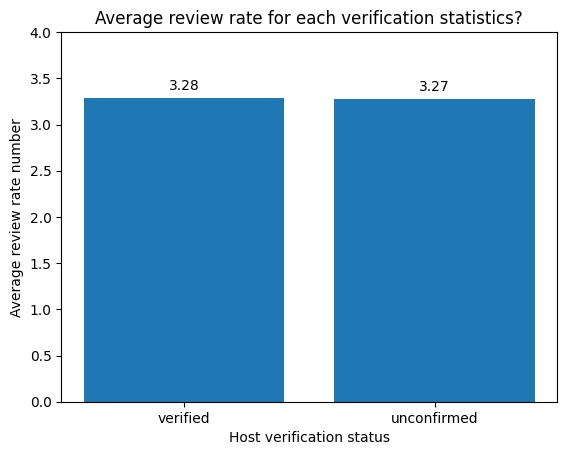

In [21]:
review_bar = plt.bar(review.index, review.loc[:,"review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:,"review rate number"], 2), padding = 4);
plt.ylim([0,4])
plt.xlabel('Host verification status');
plt.ylabel('Average review rate number');
plt.title('Average review rate for each verification statistics?');
#

Text(0.5, 1.0, 'Average review rate for each verification statistics?')

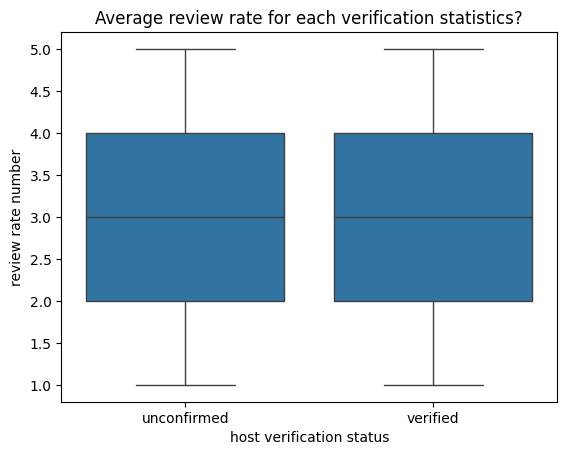

In [22]:
base_color = sns.color_palette()[0]
sns.boxplot(data, x = "host_identity_verified", y = 'review rate number', color = base_color)
plt.xlabel("host verification status")
plt.ylabel("review rate number")
plt.title("Average review rate for each verification statistics?")

In [23]:
# Is there a correlation between the price of a listing and its service fee?
data['price_$'].corr(data['service fee_$'])

np.float64(0.9999909074778258)

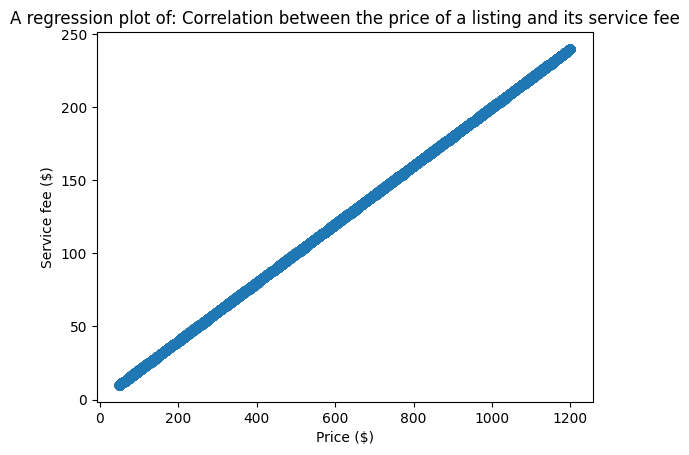

In [24]:
sns.regplot(data, x = 'price_$', y = 'service fee_$')
plt.title('A regression plot of: Correlation between the price of a listing and its service fee');
plt.xlabel('Price ($)');
plt.ylabel('Service fee ($)');

In [25]:
# What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
ARRN = data.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.379863
                    Private room               3.312548
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.243013
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.322368
Manhattan           Entire home/apt            3.268940
                    Hotel room                 3.500000
                    Private room               3.285801
                    Shared room                3.252976
Queens              Entire home/apt            3.347953
                    Hotel room                 3.750000
                    Private room               3.311761
                    Shared room                3.327402
Staten Island       Entire home/apt            3.334129
                    Private room               3.493671
                    Shared room                3.714286

Text(0.5, 1.0, 'Average review rate for each room/property type in neighbourhood group')

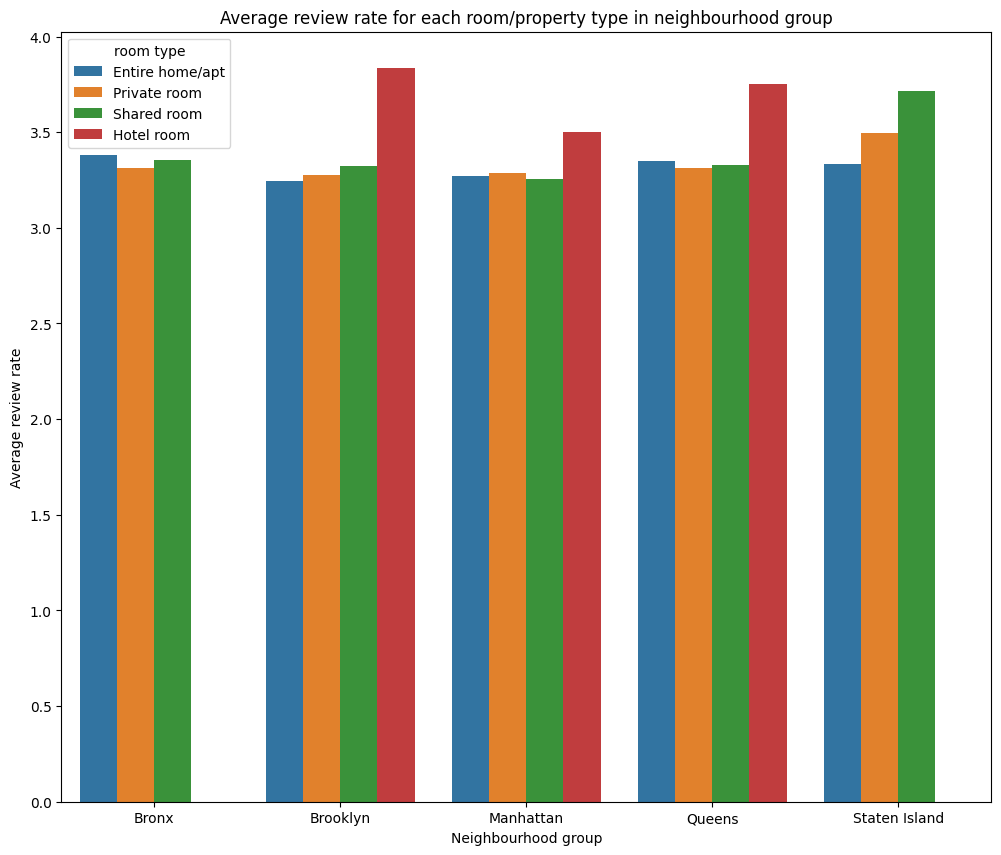

In [26]:
plt.figure(figsize = (12, 10))
sns.barplot(data = ARRN, x = 'neighbourhood group', y = 'review rate number', hue = 'room type')
plt.xlabel('Neighbourhood group')
plt.ylabel('Average review rate')
plt.title('Average review rate for each room/property type in neighbourhood group')

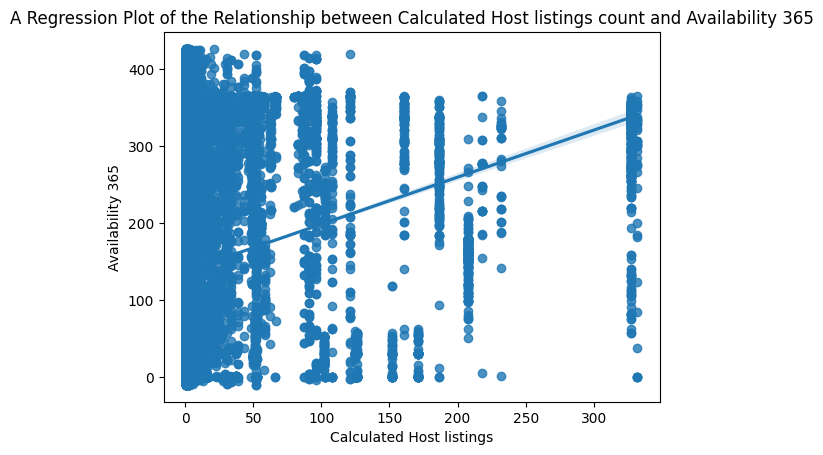

In [27]:
# Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(data, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host listings count and Availability 365');

In [28]:
data['calculated host listings count'].corr(data['availability 365'])

np.float64(0.13532575707935524)